# Loading the Preprocessed Data

In [ ]:
import os
import numpy as np

# Load the arrays
X_train = np.load('../Dataset/Train Test Dataset - Feature 5/X_train.npy')
X_test = np.load('../Dataset/Train Test Dataset - Feature 5/X_test.npy')
y_train = np.load('../Dataset/Train Test Dataset - Feature 5/y_train.npy')
y_test = np.load('../Dataset/Train Test Dataset - Feature 5/y_test.npy')

<div style="background-color: #cce5ff; padding: 10px; border: 1px solid #0066cc;">
    <h2 style="color: #0066cc; font-weight: bold;">Deep Learning Architecture - LSTM</h2>
    
</div>


# Importing Libraries - Architecture

In [76]:
import time
import tensorflow as tf
from keras.layers import LSTM
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU

### Reshaping X_train for LSTM

In [77]:
X_train_array = X_train.values
X_train_reshaped = X_train_array.reshape(X_train_array.shape[0], X_train_array.shape[1], 1)
input_shape = (X_train_reshaped.shape[1], X_train_reshaped.shape[2])  

In [78]:
input_shape

(5, 1)

# 1. Network Initialization

In [79]:
batch_size = 700  
epochs = 500  
learning_rate = 0.001
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# 2. Define Architecture

In [80]:
lstm_model = Sequential([
    
    LSTM(512, input_shape=input_shape, activation='relu', return_sequences=True),
    Dropout(0.1), 
    LSTM(256, activation='relu'),
    Dropout(0.1),  
    Dense(1, activation='sigmoid')

])

In [81]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 512)            1052672   
                                                                 
 dropout (Dropout)           (None, 5, 512)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               787456    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 1,840,385
Trainable params: 1,840,385
Non-trainable params: 0
_________________________________________________________________


# 3. Model Compilation

In [82]:
lstm_model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

## EarlyStopping Callback

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

## Model Checkpoints Callback

In [ ]:
import os
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [ ]:
checkpoint_path = '/Model Checkpoints/LSTM_Model_Checkpoint.h5'

### Check if the checkpoint file exists

In [ ]:
if os.path.exists(checkpoint_path):
    print("Loading model from checkpoint...")
    model = load_model(checkpoint_path)
else:
    print("Checkpoint not found. Initializing new model...")

### Create the checkpoint callback

In [ ]:
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path, 
    monitor='val_loss', 
    verbose=1, 
    save_best_only=True, 
    mode='min'
)

# 4. Fit Network

In [83]:
start_time = time.time()

history = lstm_model.fit(X_train_reshaped, y_train,
                         batch_size=batch_size,
                         epochs=epochs,
                         validation_split=0.1,
                         callbacks=[checkpoint, early_stopping],  
                         verbose=1)

end_time = time.time()

training_time = end_time - start_time
print("Training Time: ", training_time, "seconds")

Epoch 1/500


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


799/799 [==============================] - 24s 25ms/step - loss: 0.6518 - accuracy: 0.6156 - val_loss: 0.6411 - val_accuracy: 0.6282
Epoch 2/500
799/799 [==============================] - 20s 24ms/step - loss: 0.6348 - accuracy: 0.6318 - val_loss: 0.6271 - val_accuracy: 0.6394
Epoch 3/500
799/799 [==============================] - 20s 25ms/step - loss: 0.6229 - accuracy: 0.6412 - val_loss: 0.6179 - val_accuracy: 0.6450
Epoch 4/500
799/799 [==============================] - 20s 25ms/step - loss: 0.6137 - accuracy: 0.6471 - val_loss: 0.6096 - val_accuracy: 0.6492
Epoch 5/500
799/799 [==============================] - 20s 24ms/step - loss: 0.6056 - accuracy: 0.6531 - val_loss: 0.6028 - val_accuracy: 0.6544
Epoch 6/500
799/799 [==============================] - 21s 26ms/step - loss: 0.5977 - accuracy: 0.6595 - val_loss: 0.5936 - val_accuracy: 0.6636
Epoch 7/500
799/799 [==============================] - 19s 24ms/step - loss: 0.5888 - accuracy: 0.6656 - val_loss: 0.5839 - val_accuracy: 0.66

799/799 [==============================] - 19s 24ms/step - loss: 0.3319 - accuracy: 0.8394 - val_loss: 0.3617 - val_accuracy: 0.8285
Epoch 58/500
799/799 [==============================] - 19s 24ms/step - loss: 0.3295 - accuracy: 0.8407 - val_loss: 0.3517 - val_accuracy: 0.8326
Epoch 59/500
799/799 [==============================] - 19s 24ms/step - loss: 0.3287 - accuracy: 0.8408 - val_loss: 0.3535 - val_accuracy: 0.8310
Epoch 60/500
799/799 [==============================] - 19s 24ms/step - loss: 0.3230 - accuracy: 0.8444 - val_loss: 0.3493 - val_accuracy: 0.8336
Epoch 61/500
799/799 [==============================] - 19s 24ms/step - loss: 0.3205 - accuracy: 0.8453 - val_loss: 0.3472 - val_accuracy: 0.8342
Epoch 62/500
799/799 [==============================] - 20s 25ms/step - loss: 0.3190 - accuracy: 0.8471 - val_loss: 0.3472 - val_accuracy: 0.8344
Epoch 63/500
799/799 [==============================] - 19s 24ms/step - loss: 0.3324 - accuracy: 0.8452 - val_loss: 0.3632 - val_accuracy

799/799 [==============================] - 20s 25ms/step - loss: 0.2429 - accuracy: 0.8900 - val_loss: 0.2995 - val_accuracy: 0.8672
Epoch 114/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2357 - accuracy: 0.8931 - val_loss: 0.2999 - val_accuracy: 0.8692
Epoch 115/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2377 - accuracy: 0.8920 - val_loss: 0.3015 - val_accuracy: 0.8681
Epoch 116/500
799/799 [==============================] - 19s 24ms/step - loss: 0.2346 - accuracy: 0.8937 - val_loss: 0.3017 - val_accuracy: 0.8690
Epoch 117/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2327 - accuracy: 0.8942 - val_loss: 0.3020 - val_accuracy: 0.8677
Epoch 118/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2327 - accuracy: 0.8948 - val_loss: 0.3028 - val_accuracy: 0.8695
Epoch 119/500
799/799 [==============================] - 20s 25ms/step - loss: 0.2351 - accuracy: 0.8941 - val_loss: 0.2987 - val_ac

Epoch 169/500
799/799 [==============================] - 18s 23ms/step - loss: 0.2236 - accuracy: 0.9093 - val_loss: 0.2991 - val_accuracy: 0.8778
Epoch 170/500
799/799 [==============================] - 18s 23ms/step - loss: 0.2149 - accuracy: 0.9119 - val_loss: 0.3086 - val_accuracy: 0.8750
Epoch 171/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1998 - accuracy: 0.9132 - val_loss: 0.2951 - val_accuracy: 0.8799
Epoch 172/500
799/799 [==============================] - 20s 25ms/step - loss: 0.1963 - accuracy: 0.9145 - val_loss: 0.2963 - val_accuracy: 0.8793
Epoch 173/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1937 - accuracy: 0.9150 - val_loss: 0.2983 - val_accuracy: 0.8796
Epoch 174/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1903 - accuracy: 0.9164 - val_loss: 0.2913 - val_accuracy: 0.8816
Epoch 175/500
799/799 [==============================] - 19s 24ms/step - loss: 0.1911 - accuracy: 0.9163 - val_loss: 0

# Saving the model and training history 

In [ ]:
lstm_model.save('LSTM_Architecture_5_Features.h5')
np.save('LSTM_history_5_Features.npy', history.history)

# 5. Model Evaluation

# Importing Libraries - Evaluation

In [84]:
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Plotting Loss and Accuracy Curve

### Loss Curve

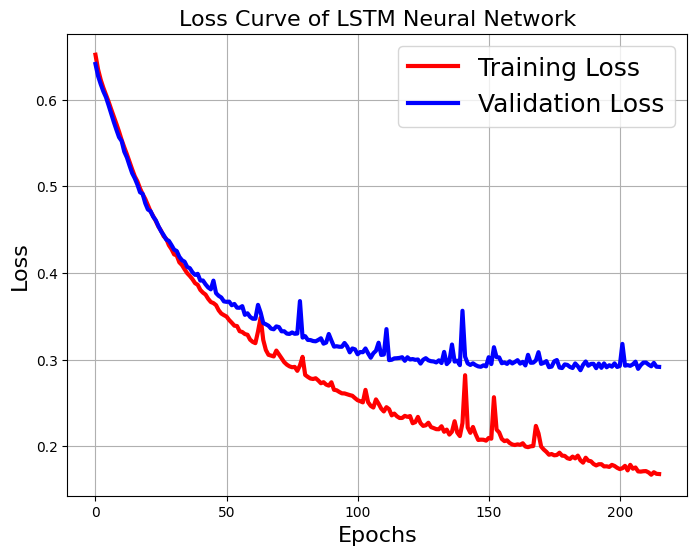

In [85]:
plt.figure(figsize=[8,6])

plt.plot(history.history['loss'], 'r', linewidth=3.0)
plt.plot(history.history['val_loss'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss', fontsize=16)

plt.legend(['Training Loss', 'Validation Loss'], fontsize=18)
plt.title('Loss Curve of LSTM Neural Network - 5 Features', fontsize=16)

plt.grid(True)
plt.show()

### Accuracy Curve

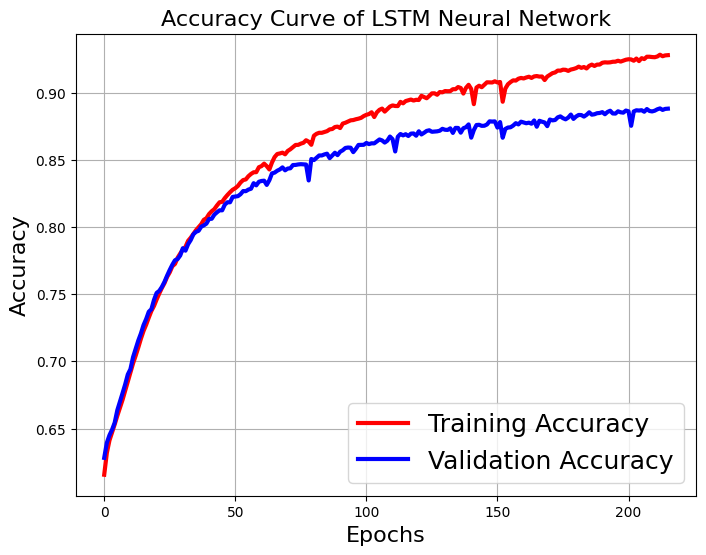

In [86]:
plt.figure(figsize=[8,6])

plt.plot(history.history['accuracy'], 'r', linewidth=3.0)
plt.plot(history.history['val_accuracy'], 'b', linewidth=3.0)

plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)

plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=18)
plt.title('Accuracy Curve of LSTM Neural Network - 5 Features', fontsize=16)

plt.grid(True)
plt.show()

### Reshaping X_test for LSTM Model Evaluation

In [87]:
X_test_array = X_test.values
X_test_reshaped = X_test_array.reshape(X_test_array.shape[0], X_test_array.shape[1], 1)

In [88]:
X_test_reshaped

array([[[ 0.46349357],
        [ 0.36358773],
        [ 3.37428511],
        [ 2.21070338],
        [-0.53335855]],

       [[-3.12902325],
        [-2.41096786],
        [-4.83420457],
        [-4.38417685],
        [ 1.45759665]],

       [[ 1.56338732],
        [ 1.49249955],
        [ 1.91877559],
        [ 1.81817072],
        [ 1.62761275]],

       ...,

       [[ 0.69592067],
        [ 0.84838968],
        [-0.60272074],
        [-0.04577766],
        [-0.3113151 ]],

       [[ 2.17107007],
        [ 2.96016373],
        [ 3.46610892],
        [ 2.54044544],
        [ 0.99792245]],

       [[ 0.16525652],
        [-0.05828783],
        [-0.23818711],
        [-0.50661368],
        [-0.80537552]]])

###  Make predictions on test data

In [89]:
y_pred_prob = lstm_model.predict(X_test_reshaped)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to classes

4853/4853 [==============================] - 21s 4ms/step


# Classification Report

In [90]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.2f}, Test loss: {test_loss:.2f}')

Test accuracy: 0.88, Test loss: 0.30


In [91]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.89     77676
           1       0.89      0.87      0.88     77614

    accuracy                           0.88    155290
   macro avg       0.88      0.88      0.88    155290
weighted avg       0.88      0.88      0.88    155290



# Confusion Matrix

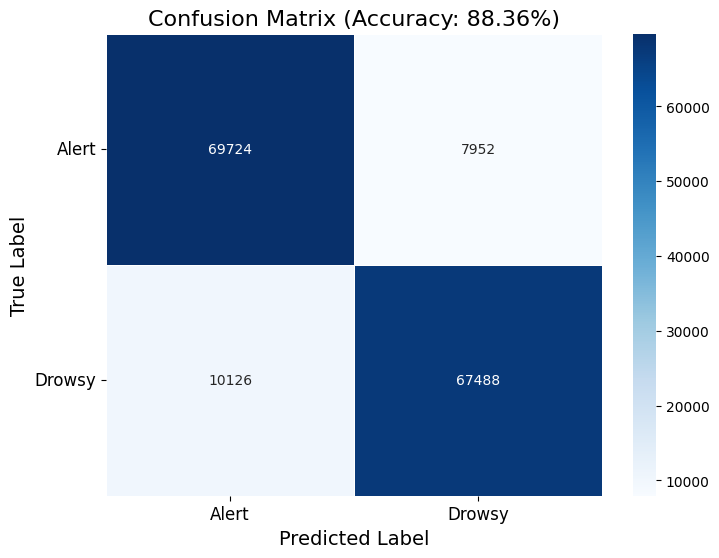

In [92]:
class_labels = ["Alert", "Drowsy"]

conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred) * 100

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=class_labels, yticklabels=class_labels, linewidths=.5)

plt.title(f'Confusion Matrix LSTM - 5 (Accuracy: {accuracy:.2f}%)', fontsize=16)

plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)

plt.xticks(rotation=0, fontsize=12)  
plt.yticks(rotation=0, fontsize=12)  

plt.show()

# Evaluation Metrics

In [93]:
# Calculate accuracy, precision, recall, F1-score, AUC-ROC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Accuracy: 0.8835855496168459
Precision: 0.8945917285259809
Recall: 0.8695338469863685
F1-score: 0.8818848249637384
AUC-ROC: 0.9545200222286261


# Receiver Operating Characteristic (ROC) Curve

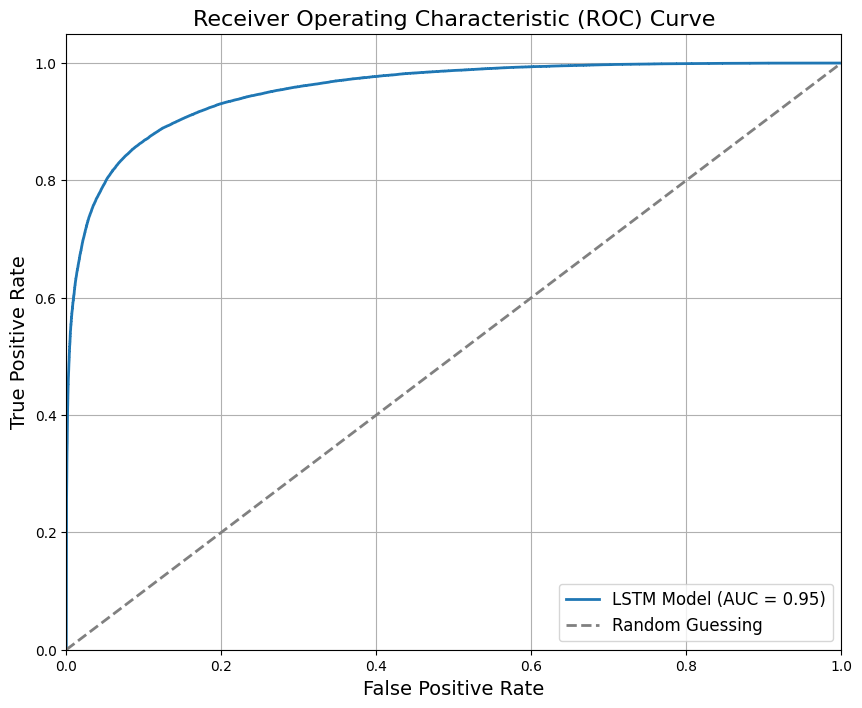

In [94]:
roc_data = {}

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
roc_data['LSTM - 5'] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

# Plotting ROC Curves 
plt.figure(figsize=(10, 8))
for name, data in roc_data.items():
    plt.plot(data['fpr'], data['tpr'], lw=2, label=f'{name} (AUC = {data["roc_auc"]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=2, label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()